**TRABAJO FINAL**

**Curso: "Análisis Predictivo y Gestión de Datos"**

**Docente: Oscar Leonardo Rincón León**



# Estudio de caso 

# 🧩 – Clasificación Puntuación Salud Mental

🔍**1. EXPLORACIÓN INICIAL DE LOS DATOS**

hABLAR DE LA BD ...........

📊  **Importar Librerías y cargue de conjunto de datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset 
df = pd.read_csv('/workspaces/Trabajo_Final_Analisis_Predictivo/datos/dt4_salud_mental.csv')
df.head(6)

,user_id,Edad,Genero,Tipo_ubicacion,Hr_pantallas,Hr_uso_movil,Hr_uso_portatil,Hr_uso_tablet,Hr_uso_tv,Hr_sueño,Nivel_stress,Actividad_fisica,Puntuacion_salud_mental,Nivel_ansiedad,Nivel_depresion
0,1,51,Femenino,Urbano,7.9,3.4,1.3,1.6,1.6,6.6,10.0,0.7,32,13,15
1,2,64,Masculino,Suburbano,8.2,3.5,1.8,0.9,2.0,4.5,6.0,4.3,75,19,18
2,3,41,Otro,Suburbano,7.6,2.1,2.6,0.7,2.2,7.1,5.0,3.1,22,7,3
3,4,27,Otro,Rural,3.2,0.0,0.0,0.7,2.5,5.1,5.0,0.0,22,7,2
4,5,55,Masculino,Urbano,5.9,1.7,1.1,1.5,1.6,7.4,7.0,3.0,64,8,10
5,6,20,Femenino,Suburbano,10.4,3.2,2.7,1.2,3.3,6.0,2.0,3.3,72,17,16


**📅 Revisión estructura del dataset**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         2000 non-null   int64  
 1   Edad                            2000 non-null   int64  
 2   Genero                          2000 non-null   object 
 3   Tipo_ubicacion                  2000 non-null   object 
 4   Hr_pantallas                    2000 non-null   float64
 5   Hr_uso_movil                    2000 non-null   float64
 6   Hr_uso_portatil                 2000 non-null   float64
 7   Hr_uso_tablet                   2000 non-null   float64
 8   Hr_uso_tv                       2000 non-null   float64
 9   Hr_sueño                        2000 non-null   float64
 10  Nivel_stress                    2000 non-null   float64
 11  Actividad_fisica                2000 non-null   float64
 12  Puntuacion_salud_mental         20

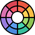**Descripción estadística general**

In [3]:
df.describe(include='all')

,user_id,Edad,Genero,Tipo_ubicacion,Hr_pantallas,Hr_uso_movil,Hr_uso_portatil,Hr_uso_tablet,Hr_uso_tv,Hr_sueño,Nivel_stress,Actividad_fisica,Puntuacion_salud_mental,Nivel_ansiedad,Nivel_depresion
count,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Femenino,Urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,935,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1000.500000,38.805500,NaN,NaN,7.523000,3.023700,1.999950,0.995650,1.503700,6.537550,5.541500,3.087150,49.650500,9.887500,10.04900
std,577.494589,14.929203,NaN,NaN,2.049783,1.449399,0.997949,0.492714,0.959003,1.203856,2.885731,1.885258,17.546717,6.027853,6.05334
min,1.000000,13.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,20.000000,0.000000,0.00000
25%,500.750000,26.000000,NaN,NaN,6.100000,2.000000,1.300000,0.600000,0.800000,5.700000,3.000000,1.600000,35.000000,5.000000,5.00000
50%,1000.500000,39.000000,NaN,NaN,7.500000,3.000000,2.000000,1.000000,1.500000,6.600000,6.000000,3.000000,49.000000,10.000000,10.00000
75%,1500.250000,51.000000,NaN,NaN,8.900000,4.000000,2.700000,1.300000,2.200000,7.400000,8.000000,4.400000,64.250000,15.000000,15.00000


🔍**2. VISUALIZACIÓN EXPLORATORIA DE LOS DATOS**

**Gráfica 1: Distribución por Género**

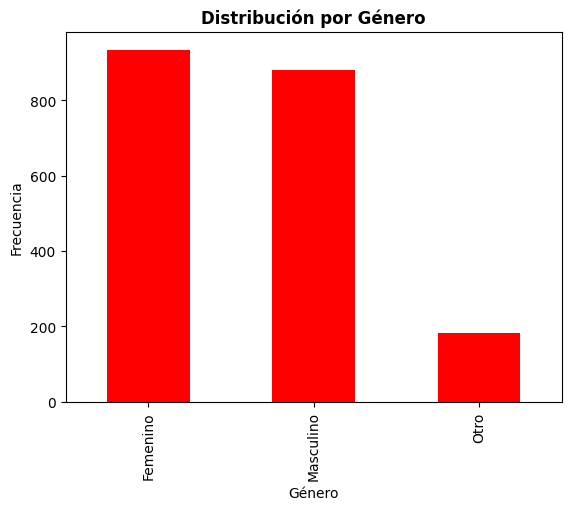

In [4]:
df['Genero'].value_counts().plot(kind='bar', color="red")
plt.title('Distribución por Género', fontsize=12, fontweight="bold")
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación**: Este gráfico nos muestra la distribución de los datos por la categoría **Género** de la base de datos a explorar. Es muy importante tener la categoría **"Otro"**, ya que influye en la tendencia o probabilidad que queremos descubrir. 
Esta categoria nos indica que tenemos 935 casos como "Femenino", 882 como "Masculino" y 183 como "Otro", para un total de 2000 casos a estudiar. 

**Gráfico 2: Histograma de Edades**

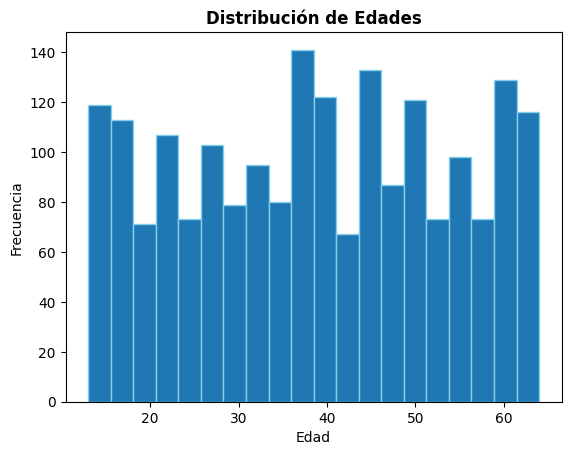

In [5]:
df['Edad'].dropna().plot(kind='hist', bins=20, edgecolor='skyblue')
plt.title('Distribución de Edades', fontsize=12, fontweight="bold")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación:**

**Gráfico 3: Boxplot de Horas Pantallas por Género**

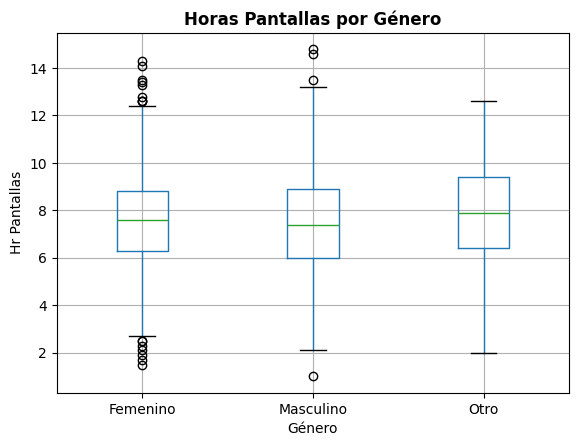

In [23]:
df.boxplot(column='Hr_pantallas', by='Genero')
plt.title('Horas Pantallas por Género', fontsize=12, fontweight="bold")
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Hr Pantallas')
plt.show()

**Interpretación:**

**Gráfico 4: Boxplot de Horas sueño por Género**

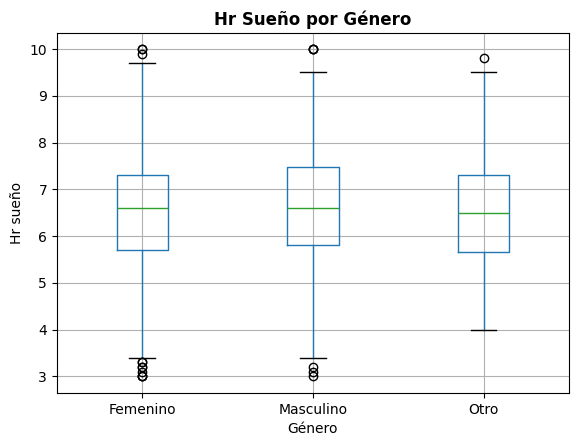

In [7]:
df.boxplot(column='Hr_sueño', by='Genero')
plt.title('Hr Sueño por Género', fontsize=12, fontweight="bold")
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Hr sueño')
plt.show()

**Interpretación:**

**Gráfico 5: Boxplot de Nivel de Stress por Género**

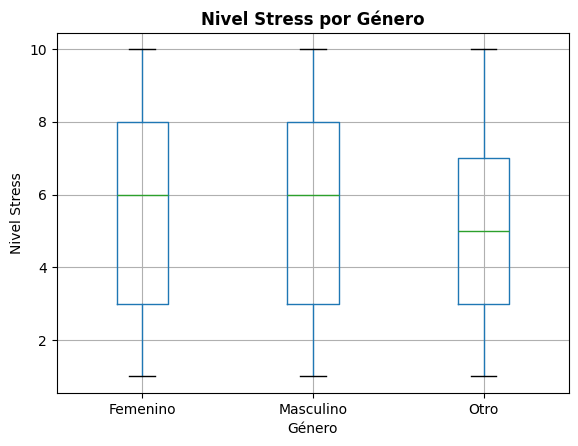

In [8]:
df.boxplot(column='Nivel_stress', by='Genero')
plt.title('Nivel Stress por Género', fontsize=12, fontweight="bold")
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Nivel Stress')
plt.show()

**Interpretación:**

**Gráfico 6: Boxplot de Puntuación Salud Mental por Género**

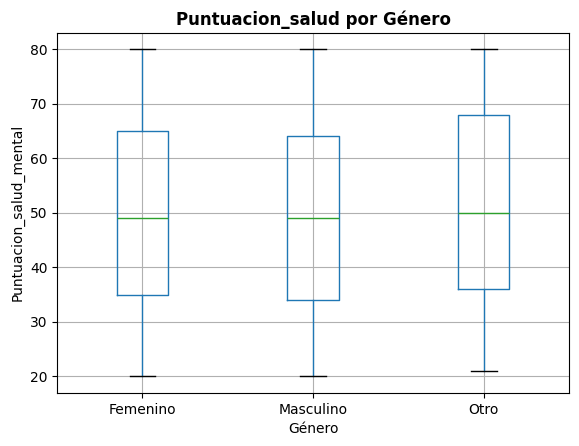

In [9]:
df.columns = df.columns.str.strip()
df.boxplot(column='Puntuacion_salud_mental', by='Genero')
plt.title('Puntuacion_salud por Género', fontsize=12, fontweight="bold")
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Puntuacion_salud_mental')
plt.show()

**Interpretación:**

**Gráfico 7: Boxplot de Horas Pantallas por Género**

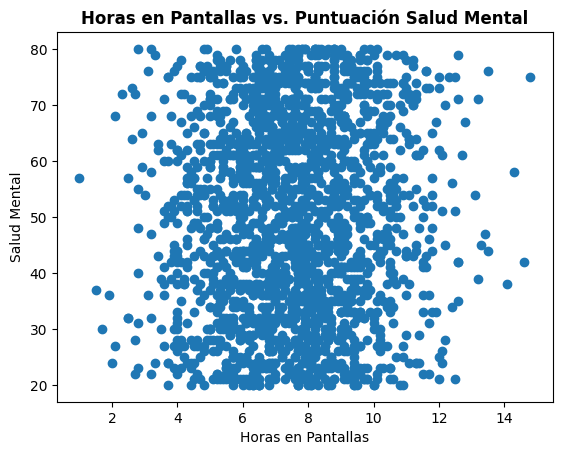

In [10]:
df.columns = df.columns.str.strip()
plt.scatter(df['Hr_pantallas'], df['Puntuacion_salud_mental'])
plt.title('Horas en Pantallas vs. Puntuación Salud Mental', fontsize=12, fontweight="bold")
plt.xlabel('Horas en Pantallas')
plt.ylabel('Salud Mental')
plt.show()

**Interpretación:**

**Gráfico 8: Promedio uso de los Dispositivos de Pantallas Digitales**

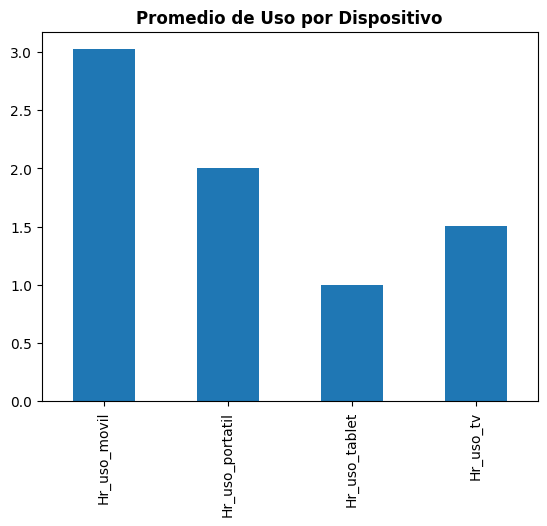

In [11]:
uso_dispositivos = df[['Hr_uso_movil', 'Hr_uso_portatil', 'Hr_uso_tablet', 'Hr_uso_tv']].mean()
uso_dispositivos.plot(kind='bar')
plt.title('Promedio de Uso por Dispositivo', fontsize=12, fontweight="bold")
plt.show()

**Interpretación:**

**Gráfico 9: Boxplot de  Distribución Nivel de Ansiedad y Depresión por Género**

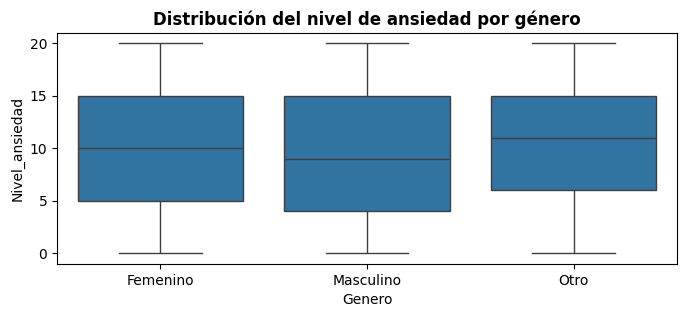

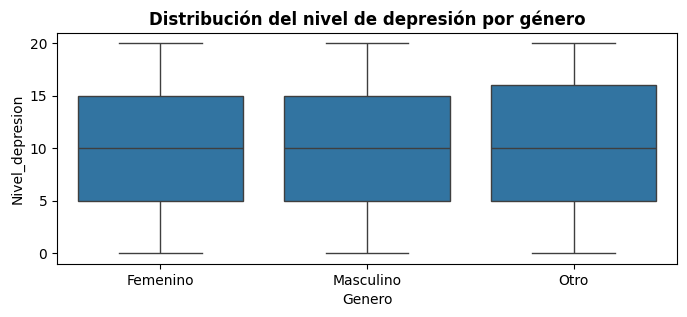

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nivel de ansiedad por género
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='Genero', y='Nivel_ansiedad')
plt.title('Distribución del nivel de ansiedad por género', fontsize=12, fontweight="bold")
plt.show()

# Nivel de depresión por género
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='Genero', y='Nivel_depresion')
plt.title('Distribución del nivel de depresión por género', fontsize=12, fontweight="bold")
plt.show()

**Interpretación:**

**Gráfico 10: Gráfico de Barras Promedio Nivel de Ansiedad y Depresión por Género**

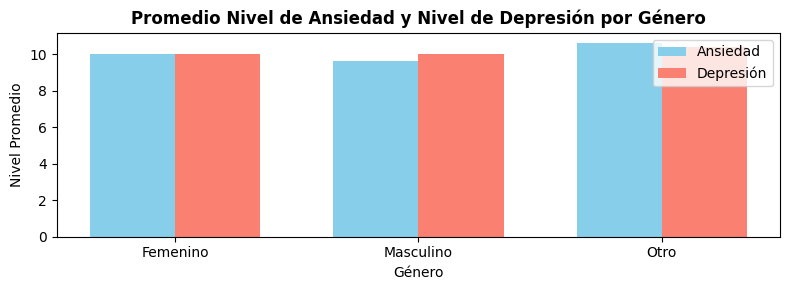

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por género y calcular promedios
promedios = df.groupby('Genero')[['Nivel_ansiedad', 'Nivel_depresion']].mean().reset_index()

# Configurar los datos para el gráfico
generos = promedios['Genero']
ansiedad = promedios['Nivel_ansiedad']
depresion = promedios['Nivel_depresion']

# Posiciones en el eje X
x = range(len(generos))
ancho = 0.35  # ancho de las barras

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 3))
ax.bar([i - ancho/2 for i in x], ansiedad, width=ancho, label='Ansiedad', color='skyblue')
ax.bar([i + ancho/2 for i in x], depresion, width=ancho, label='Depresión', color='salmon')

# Etiquetas y leyenda
ax.set_xlabel('Género')
ax.set_ylabel('Nivel Promedio')
ax.set_title('Promedio Nivel de Ansiedad y Nivel de Depresión por Género', fontsize=12, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(generos)
ax.legend()

plt.tight_layout()
plt.show()

**Interpretación:**

🔍**3. CREACIÓN VARIABLE OBJETIVO**

In [14]:
#CREAR VARIABLE OBJETIVO

In [15]:
# Crear variable objetivo: Alta Afectación Mental
df.columns = df.columns.str.strip()
df["Alta_Afectacion_Mental"] = (df["Puntuacion_salud_mental"] > 50).astype(int)

df.head(10)

,user_id,Edad,Genero,Tipo_ubicacion,Hr_pantallas,Hr_uso_movil,Hr_uso_portatil,Hr_uso_tablet,Hr_uso_tv,Hr_sueño,Nivel_stress,Actividad_fisica,Puntuacion_salud_mental,Nivel_ansiedad,Nivel_depresion,Alta_Afectacion_Mental
0,1,51,Femenino,Urbano,7.9,3.4,1.3,1.6,1.6,6.6,10.0,0.7,32,13,15,0
1,2,64,Masculino,Suburbano,8.2,3.5,1.8,0.9,2.0,4.5,6.0,4.3,75,19,18,1
2,3,41,Otro,Suburbano,7.6,2.1,2.6,0.7,2.2,7.1,5.0,3.1,22,7,3,0
3,4,27,Otro,Rural,3.2,0.0,0.0,0.7,2.5,5.1,5.0,0.0,22,7,2,0
4,5,55,Masculino,Urbano,5.9,1.7,1.1,1.5,1.6,7.4,7.0,3.0,64,8,10,1
5,6,20,Femenino,Suburbano,10.4,3.2,2.7,1.2,3.3,6.0,2.0,3.3,72,17,16,1
6,7,33,Masculino,Urbano,10.4,4.0,3.2,1.9,1.3,5.9,9.0,6.8,45,6,4,0
7,8,51,Femenino,Urbano,10.2,2.9,3.0,0.9,3.4,5.3,2.0,3.5,23,9,8,0
8,9,31,Femenino,Suburbano,7.0,2.3,2.9,1.4,0.4,7.1,9.0,0.0,35,0,0,0
9,10,35,Masculino,Urbano,10.4,6.4,2.1,1.4,0.5,7.1,4.0,3.5,47,3,8,0


In [16]:
#EVALUACIÓN DEL MODELO ANTES DE LIMPIAR LOS DATOS

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Usamos cinco variables, eliminando nulos
df.columns = df.columns.str.strip()
df_before = df[["Hr_pantallas", "Hr_sueño", "Nivel_stress", "Nivel_ansiedad", "Nivel_depresion" ]].dropna()
Xb = df_before
yb = df.loc[df_before.index, "Alta_Afectacion_Mental"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))

✅ Exactitud antes de la limpieza: 0.4717


PREPARACIÓN DEL DATASET: LIMPIEZA, IMPUTACIÓN Y CODIFICACIÓN




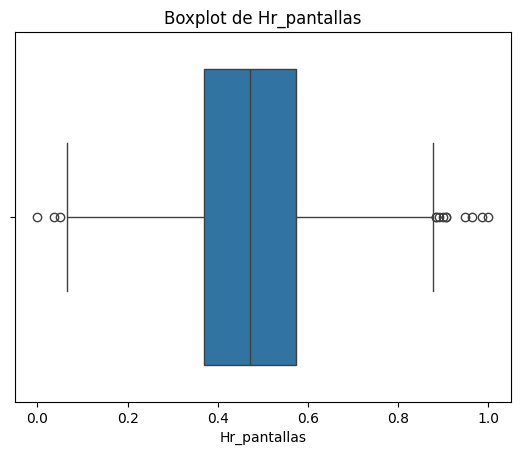

Outliers eliminados: 13
Outliers eliminados por Z-score: 5


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df.copy()

# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['Genero', 'Tipo_ubicacion'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[["Hr_pantallas", "Hr_sueño", "Nivel_stress", "Nivel_ansiedad", "Nivel_depresion"]] = scaler.fit_transform(df_clean[["Hr_pantallas", "Hr_sueño", "Nivel_stress",  "Nivel_ansiedad", "Nivel_depresion"]])

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Pasos para borrar Outliers

# Paso 1: Visualización de los datos para detectar valores atípicos
# Boxplot para detectar outliers en la columna 'Hr_pantallas'
sns.boxplot(x=df_clean['Hr_pantallas'])
plt.title('Boxplot de Hr_pantallas')
plt.show()
 
 # Paso 2: Método IQR para detectar outliers
Q1 = df_clean['Hr_pantallas'].quantile(0.25)
Q3 = df_clean['Hr_pantallas'].quantile(0.75)
IQR = Q3 - Q1
 
# Calcular los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 
# Filtrar los datos para eliminar los outliers
df_no_outliers = df_clean[(df_clean['Hr_pantallas'] >= lower_bound) & (df_clean['Hr_pantallas'] <= upper_bound)]
print(f"Outliers eliminados: {len(df_clean) - len(df_no_outliers)}")
 
# Paso 4: Método Z-Score para detectar outliers
df_clean['Hr_pantallas_zscore'] = zscore(df_clean['Hr_pantallas'])
 
# Filtrar los valores atípicos (Z-score mayor a 3 o menor a -3)
df_no_outliers_zscore = df_clean[df_clean['Hr_pantallas_zscore'].abs() <= 3]
print(f"Outliers eliminados por Z-score: {len(df_clean) - len(df_no_outliers_zscore)}")
 
# Paso 5: Imputación, codificación y escalado de los datos
df_no_outliers_clean = df_no_outliers.copy()

 


 EVALUACIÓN DEL MODELO DESPUES DE LA LIMPIEZA



In [19]:
Xc = df_clean.drop(columns=['user_id', 'Puntuacion_salud_mental', 'Alta_Afectacion_Mental'])
yc = df_clean['Alta_Afectacion_Mental']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

model_after = LogisticRegression(max_iter=1000)
model_after.fit(Xc_train, yc_train)
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

#Evaluar con más métricas
from sklearn.metrics import classification_report, confusion_matrix
# Reporte de clasificación

print("\n📈 Reporte de clasificación después de la limpieza:")
print(classification_report(yc_test, yc_pred))

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))


📈 Reporte de clasificación después de la limpieza:
              precision    recall  f1-score   support

           0       0.48      0.70      0.57       303
           1       0.43      0.23      0.30       297

    accuracy                           0.47       600
   macro avg       0.46      0.47      0.44       600
weighted avg       0.46      0.47      0.44       600

✅ Exactitud después de la limpieza: 0.4683


xxxxx para explicación de la evaluación del modelo despues de la limpieza

Exploración y visualización de patrones

Visualización univariada: distribuciones

Visualización univariada: distribuciones
Análisis de la distribución de Edad

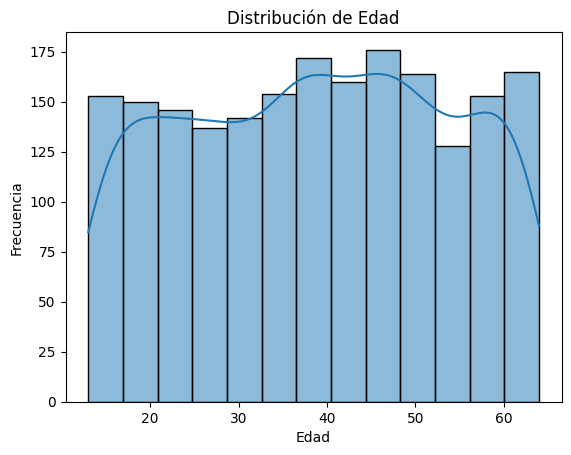

In [20]:
# Histograma de Edad
sns.histplot(df['Edad'], kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

HISTOGRAMA DE HORAS PANTALLA 

In [21]:
cols_to_plot = ['daily_screen_time_hours', 'social_media_hours', 'sleep_duration_hours', 'mental_health_score']
for col in cols_to_plot:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

KeyError: 'daily_screen_time_hours'

📦 Análisis del boxplot de Género

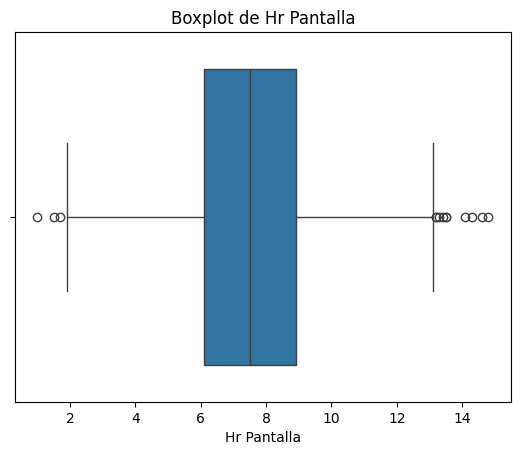

In [ ]:
# Boxplot de Horas Pantalla
sns.boxplot(x=df['Hr_pantallas'])
plt.title('Boxplot de Hr Pantalla')
plt.xlabel('Hr Pantalla')
plt.show()

Explicación de la visualización de boxplot de Género


🔁 Análisis de dispersión: Edad vs Horas Pantalla

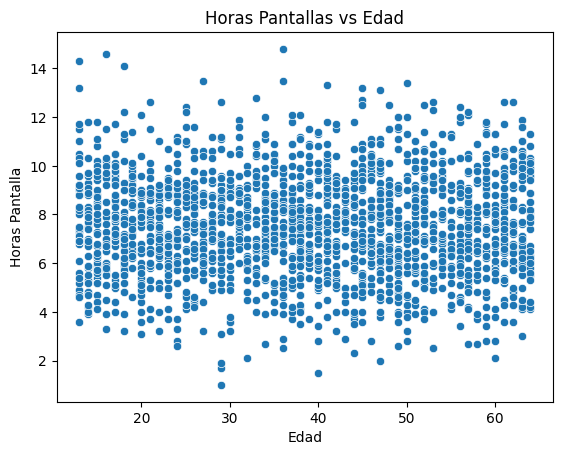

In [ ]:
# Dispersión entre Edad y Horas Pantalla
sns.scatterplot(x='Edad', y='Hr_pantallas', data=df)
plt.title('Horas Pantallas vs Edad')
plt.xlabel('Edad')
plt.ylabel('Horas Pantalla')
plt.show()

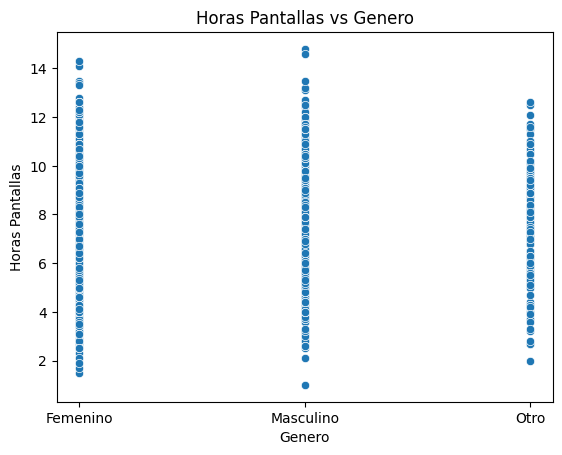

In [ ]:
# Dispersión entre Genero y Horas Pantalla
sns.scatterplot(x='Genero', y='Hr_pantallas', data=df)
plt.title('Horas Pantallas vs Genero')
plt.xlabel('Genero')
plt.ylabel('Horas Pantallas')
plt.show()

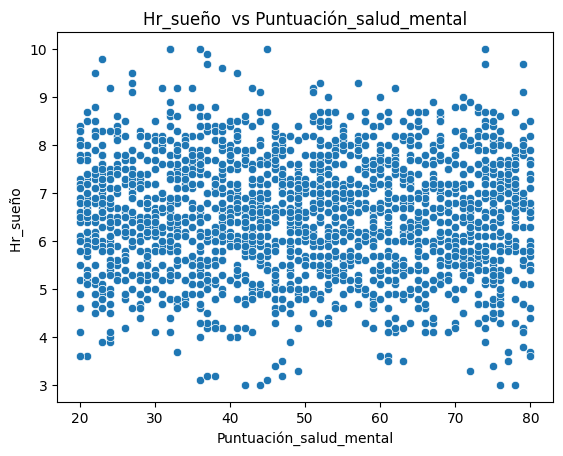

In [ ]:
# Dispersión entre Puntuación_salud_mental y Hr_sueño 
sns.scatterplot(x='Puntuacion_salud_mental', y='Hr_sueño', data=df)
plt.title('Hr_sueño  vs Puntuación_salud_mental')
plt.xlabel('Puntuación_salud_mental')
plt.ylabel('Hr_sueño ')
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


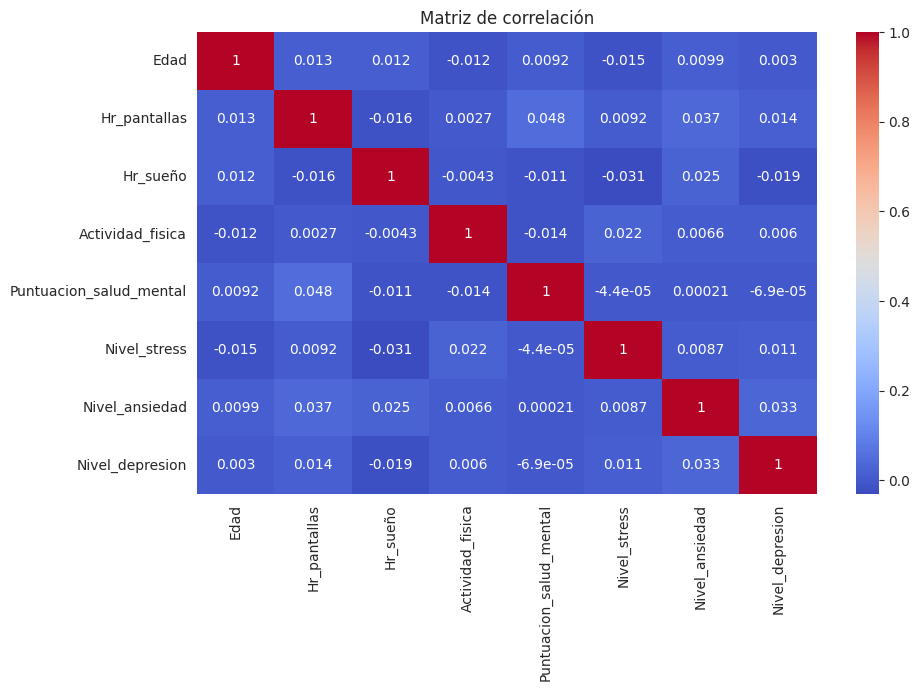

In [ ]:
 #Mapa de calor de correlaciones numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df[["Edad", "Hr_pantallas", "Hr_sueño", "Actividad_fisica", "Puntuacion_salud_mental", "Nivel_stress", "Nivel_ansiedad", "Nivel_depresion" ]].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

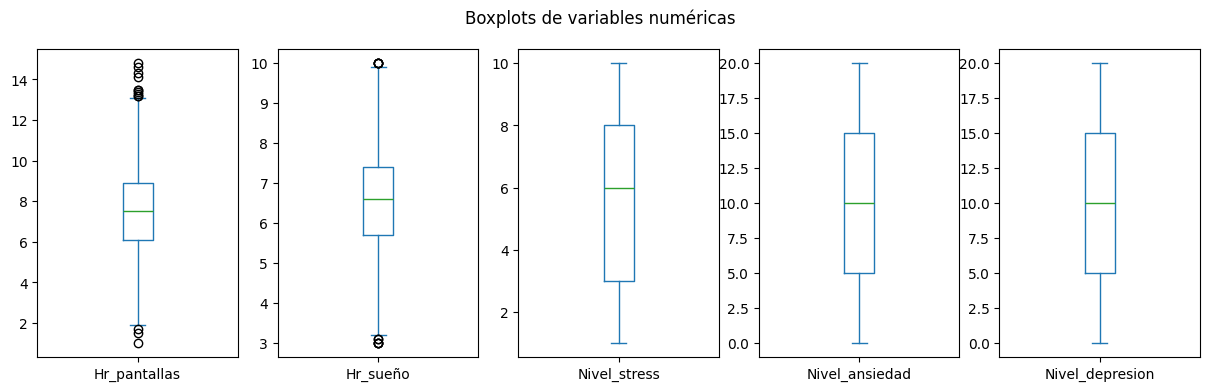

In [ ]:
#Boxplot conjunto
df[["Hr_pantallas", "Hr_sueño", "Nivel_stress", "Nivel_ansiedad", "Nivel_depresion"]].plot(kind='box', subplots=True, layout=(1, 5), figsize=(15, 4))
plt.suptitle('Boxplots de variables numéricas')
plt.show()

In [ ]:
#Sección 4

CLASIFICACIÓN SALUD MENTAL

In [ ]:
import pandas as pd
from IPython.display import FileLink
 
# Leer el archivo CSV original
df = pd.read_csv('/workspaces/Trabajo_Final_Analisis_Predictivo/datos/dt4_salud_mental.csv')
 
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()
 
# Crear la columna 'Alta_Afectación_Mental' en función de 'Puntuacion_salud_mental'
df["Alta_Afectacion_Mental"] = (df["Puntuacion_salud_mental"] > 64).astype(int)
 
# Verificar que la columna se haya añadido correctamente
print(df.columns)  # Verifica que la columna está en el DataFrame
 
# Guardar el DataFrame con la nueva columna como un archivo CSV
df.to_csv('dt5_salud_mental_psm.csv', index=False)
 
# Crear un enlace de descarga en Jupyter
FileLink('dt5_salud_mental_psm.csv')
 

Index(['user_id', 'Edad', 'Genero', 'Tipo_ubicacion', 'Hr_pantallas',
       'Hr_uso_movil', 'Hr_uso_portatil', 'Hr_uso_tablet', 'Hr_uso_tv',
       'Hr_sueño', 'Nivel_stress', 'Actividad_fisica',
       'Puntuacion_salud_mental', 'Nivel_ansiedad', 'Nivel_depresion',
       'Alta_Afectacion_Mental'],
      dtype='object')


/workspaces/Trabajo_Final_Analisis_Predictivo/session-01/dt5_salud_mental_psm.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar datos limpios
df = pd.read_csv('/workspaces/Trabajo_Final_Analisis_Predictivo/datos/dt5_salud_mental_psm.csv')

In [ ]:
X = df.drop(columns=['user_id', 'Puntuacion_salud_mental', 'Alta_Afectacion_Mental'])
y = df['Alta_Afectacion_Mental']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas en caso de que falte alguna categoría en test o train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("Exactitud:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

Exactitud: 0.6983
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       445
           1       0.26      0.09      0.13       155

    accuracy                           0.70       600
   macro avg       0.50      0.50      0.48       600
weighted avg       0.62      0.70      0.64       600



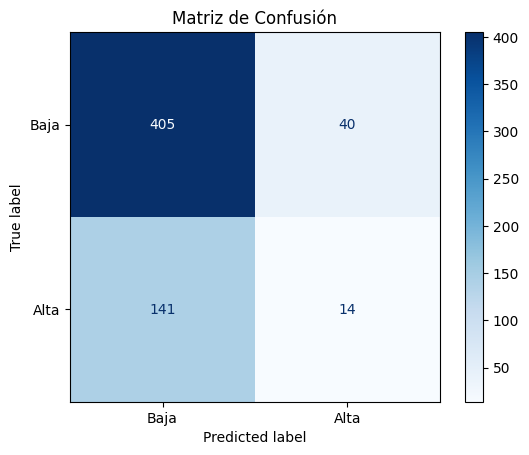

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()


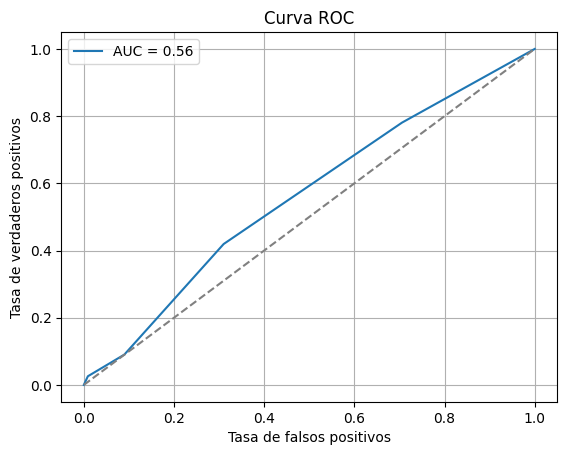

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

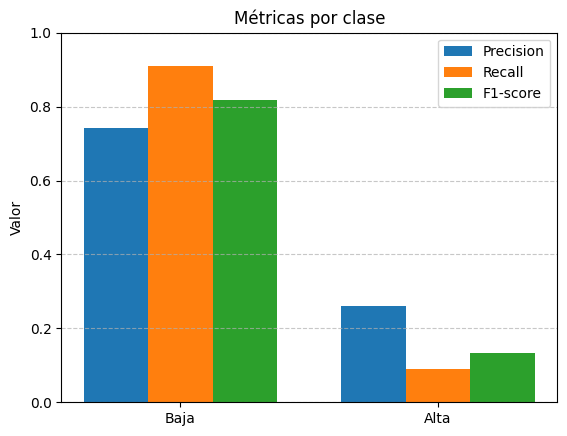

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

metrics = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
labels = ["Baja", "Alta"]
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, metrics[0], width, label='Precision')
ax.bar(x, metrics[1], width, label='Recall')
ax.bar(x + width, metrics[2], width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel("Valor")
ax.set_title("Métricas por clase")
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


✅ SECCIÓN 5